### Overview of Customer Churn Dataset

In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_path = "data/customer_churn_data.csv"

dataset = pd.read_csv(dataset_path)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset does not contain any null values.

The feature `Total charges` has dtype = `object` but it is actually a numerical features.
Also, `SeniorCitizen` has dtype = `int64` but it is actually a categorical feature.

In [63]:
dataset["SeniorCitizen"] = dataset["SeniorCitizen"].astype(object)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')

In [64]:
# dropping customer ID since it is of little value
dataset = dataset.drop("customerID", axis=1)

In [65]:
# Frequency tables for each categorical feature 
for column in dataset.select_dtypes(include=["object"]).columns:
    display(pd.crosstab(index=dataset[column], columns="% observations", normalize="columns"))
    

col_0,% observations
gender,
Female,0.495244
Male,0.504756


col_0,% observations
SeniorCitizen,
0,0.837853
1,0.162147


col_0,% observations
Partner,
No,0.516967
Yes,0.483033


col_0,% observations
Dependents,
No,0.700412
Yes,0.299588


col_0,% observations
PhoneService,
No,0.096834
Yes,0.903166


col_0,% observations
MultipleLines,
No,0.481329
No phone service,0.096834
Yes,0.421837


col_0,% observations
InternetService,
DSL,0.343746
Fiber optic,0.439585
No,0.216669


col_0,% observations
OnlineSecurity,
No,0.496663
No internet service,0.216669
Yes,0.286668


col_0,% observations
OnlineBackup,
No,0.438450
No internet service,0.216669
Yes,0.344881


col_0,% observations
DeviceProtection,
No,0.439443
No internet service,0.216669
Yes,0.343888


col_0,% observations
TechSupport,
No,0.493114
No internet service,0.216669
Yes,0.290217


col_0,% observations
StreamingTV,
No,0.398978
No internet service,0.216669
Yes,0.384353


col_0,% observations
StreamingMovies,
No,0.395428
No internet service,0.216669
Yes,0.387903


col_0,% observations
Contract,
Month-to-month,0.550192
One year,0.209144
Two year,0.240664


col_0,% observations
PaperlessBilling,
No,0.407781
Yes,0.592219


col_0,% observations
PaymentMethod,
Bank transfer (automatic),0.219225
Credit card (automatic),0.216101
Electronic check,0.335794
Mailed check,0.228880


col_0,% observations
Churn,
No,0.73463
Yes,0.26537


The last table shows that the dataset is imbalanced, with 73.4% No Churn and 26.5% Churned customers.

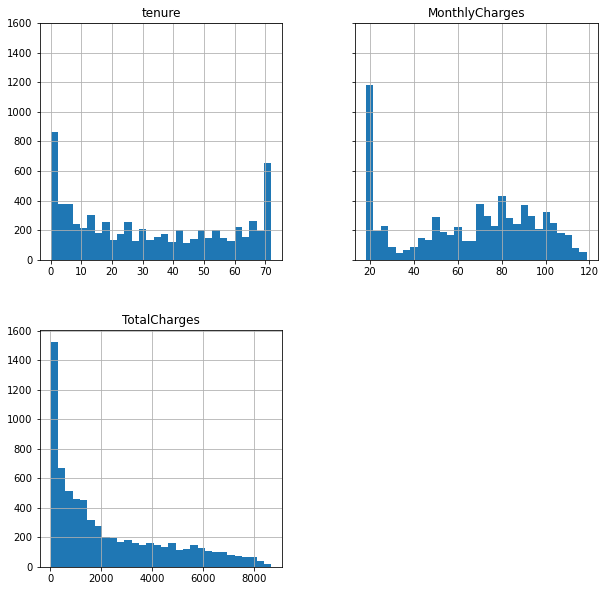

In [66]:
# Histogram of numerical features
%matplotlib inline
hist = dataset.hist(bins=30, sharey=True, figsize=(10, 10))

Checking out the relationship between features and target variable

Churn,No,Yes
gender,,
Female,0.492656,0.502408
Male,0.507344,0.497592


Churn,No,Yes
SeniorCitizen,,
0,0.871279,0.745318
1,0.128721,0.254682


Churn,No,Yes
Partner,,
No,0.471782,0.642055
Yes,0.528218,0.357945


Churn,No,Yes
Dependents,,
No,0.655199,0.825575
Yes,0.344801,0.174425


Churn,No,Yes
PhoneService,,
No,0.098956,0.090958
Yes,0.901044,0.909042


Churn,No,Yes
MultipleLines,,
No,0.491109,0.454254
No phone service,0.098956,0.090958
Yes,0.409934,0.454789


Churn,No,Yes
InternetService,,
DSL,0.379204,0.245586
Fiber optic,0.347700,0.693954
No,0.273096,0.060460


Churn,No,Yes
OnlineSecurity,,
No,0.393699,0.781701
No internet service,0.273096,0.060460
Yes,0.333204,0.157838


Churn,No,Yes
OnlineBackup,,
No,0.358523,0.659711
No internet service,0.273096,0.060460
Yes,0.368380,0.279829


Churn,No,Yes
DeviceProtection,,
No,0.364128,0.64794
No internet service,0.273096,0.06046
Yes,0.362775,0.29160


Churn,No,Yes
TechSupport,,
No,0.391767,0.773676
No internet service,0.273096,0.060460
Yes,0.335137,0.165864


Churn,No,Yes
StreamingTV,,
No,0.361036,0.504013
No internet service,0.273096,0.060460
Yes,0.365868,0.435527


Churn,No,Yes
StreamingMovies,,
No,0.356977,0.501873
No internet service,0.273096,0.060460
Yes,0.369927,0.437667


Churn,No,Yes
Contract,,
Month-to-month,0.429068,0.885500
One year,0.252609,0.088818
Two year,0.318322,0.025682


Churn,No,Yes
PaperlessBilling,,
No,0.464438,0.250936
Yes,0.535562,0.749064


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.248550,0.138042
Credit card (automatic),0.249324,0.124131
Electronic check,0.250097,0.573034
Mailed check,0.252029,0.164794


tenure


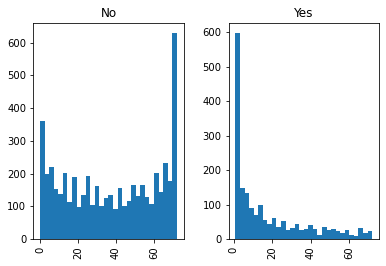

MonthlyCharges


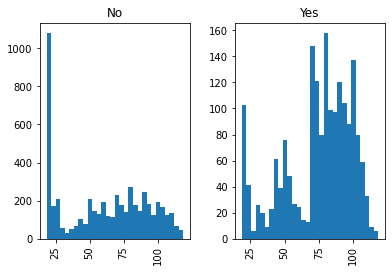

TotalCharges


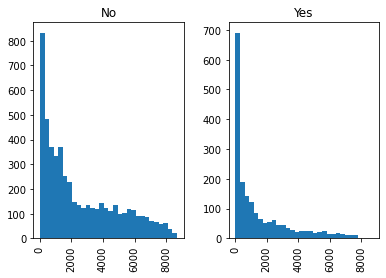

In [67]:
for column in dataset.select_dtypes(include=["object"]).columns:
    if column != "Churn":
        display(pd.crosstab(index=dataset[column], columns=dataset["Churn"], normalize="columns"))

for column in dataset.select_dtypes(exclude=["object"]).columns:
    print(column)
    hist = dataset[[column, "Churn"]].hist(by="Churn", bins=30)
    plt.show()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


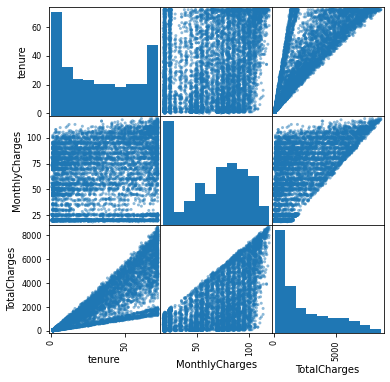

In [68]:
# Checking if numerical features are correlated with each other

display(dataset.corr())
pd.plotting.scatter_matrix(dataset, figsize=(6, 6))
plt.show()

### Data Preparation for Modelling with Gradient Boosted Tree

XGBoost uses gradient boosted trees which naturally account for non-linear relationships between features and the target variable, as well as accommodating complex interactions between features.

Amazon SageMaker provides an XGBoost container that we can use to train in a managed, distributed setting, and then host as a real-time prediction endpoint.

Sagemaker requires the predictor variable in first row and no header row.
Making these changes in our churn dataset.
But first, let's convert the categorical features to numerical features by one-hot encoding using pandas dummies function.

In [69]:
model_data = pd.get_dummies(dataset)
model_data

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7039,72,103.20,7362.90,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7040,11,29.60,346.45,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
7041,4,74.40,306.60,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,1,0,1


In [71]:
model_data = pd.concat(
    [model_data["Churn_Yes"], model_data.drop(["Churn_Yes", "Churn_No"], axis=1)], axis=1)
model

Splitting the data into train, validation and test set.

### Splitting the dataset

In [78]:
train_data, validation_data, test_data = np.split(
    model_data.sample(frac=1, random_state=42),
    [int(0.7 * len(model_data)), int(0.9 * len(model_data))],
)
train_data.to_csv("data/train.csv", header=False, index=False)
validation_data.to_csv("data/validation.csv", header=False, index=False)
test_data.to_csv("data/test.csv", header=False, index=False)


### Saving the train, validation and test set to S3 buckets


In [79]:
import boto3 
import sagemaker

prefix = "customer-churn-ml-prediction/telco_churn_data/"
sess = sagemaker.Session()
bucket = sess.default_bucket()

boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "train/train.csv")
).upload_file("data/train.csv")
boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "validation/validation.csv")
).upload_file("data/validation.csv")
boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "test/test.csv")
).upload_file("data/test.csv")